In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1: CONGRESSIONAL REPRESENTATION #

In [2]:
repDF = pd.read_csv("representatives_MASTER.csv")

In [3]:
term108 = repDF.loc[(repDF["term"]) == 108].groupby(["group"]).count()["name"].to_dict()
term109 = repDF.loc[(repDF["term"]) == 109].groupby(["group"]).count()["name"].to_dict()
term110 = repDF.loc[(repDF["term"]) == 110].groupby(["group"]).count()["name"].to_dict()
term111 = repDF.loc[(repDF["term"]) == 111].groupby(["group"]).count()["name"].to_dict()
term112 = repDF.loc[(repDF["term"]) == 112].groupby(["group"]).count()["name"].to_dict()
term113 = repDF.loc[(repDF["term"]) == 113].groupby(["group"]).count()["name"].to_dict()
term114 = repDF.loc[(repDF["term"]) == 114].groupby(["group"]).count()["name"].to_dict()
term115 = repDF.loc[(repDF["term"]) == 115].groupby(["group"]).count()["name"].to_dict()

In [4]:
dictionaries = [term108, term109, term110, term111, term112, term113, term114, term115]
groups = ['Democrat', 'Republican', 'Popular Democrat', 'Independent']

In [5]:
demSeats = [210, 206, 246, 267, 206, 209, 194, 204]
repSeats = [232, 237, 206, 182, 244, 240, 252, 252]
popDemSeats = [1, 0, 0, 0, 0, 0, 0, 0]
indepSeats = [1, 1, 0, 0, 0, 0, 1, 0]
congressionalTerms = ["108 ('03-'05)", "109 ('05-'07)", "110 ('07-'09)", "111 ('09-'11)", "112 ('11-'13)", "113 ('13-'15)", "114 ('15-'17)", "115 ('17-'19)"]

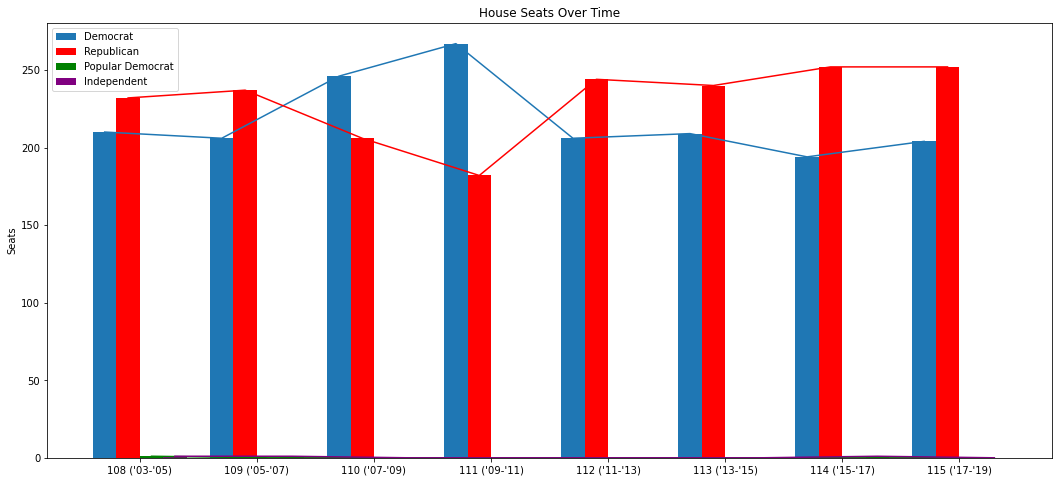

In [6]:
plt.figure(figsize=(18, 8))
width = 0.2
firstbar = np.arange(len(congressionalTerms))
secondbar = [i + width for i in firstbar]
thirdbar = [i + width for i in secondbar]
fourthbar = [i + width for i in thirdbar]

plt.bar(firstbar, demSeats, width, label="Democrat")
plt.plot(firstbar, demSeats)

plt.bar(secondbar, repSeats, width, label="Republican", color="Red")
plt.plot(secondbar, repSeats, color="Red")

plt.bar(thirdbar, popDemSeats, width, label="Popular Democrat", color="Green")
plt.plot(thirdbar, popDemSeats, color="Green")

plt.bar(fourthbar, indepSeats, width, label="Independent", color="Purple")
plt.plot(fourthbar, indepSeats, color="Purple")

plt.xticks((firstbar + (width*1.5)), congressionalTerms)
plt.title("House Seats Over Time")
plt.ylabel("Seats")
plt.legend()

# 2: GUN VIOLENCE #

In [7]:
gunvDF = pd.read_csv("gun-violence-data_PROCESSED.csv")

In [8]:
gunvDF[["year", "month", "day"]] = gunvDF["date"].str.split('-', expand=True)

In [9]:
# DROP YEAR 2013 -- HAS LESS THAN 200 RECORDS WHICH IS NOT ACCURATE
# DROP YEAR 2018 -- HAS ONLY 3 MONTHS OF DATA

gunvDF.drop(gunvDF[gunvDF.year == "2013"].index, inplace=True)
gunvDF.drop(gunvDF[gunvDF.year == "2018"].index, inplace=True)

## *Incidents by Month* ##

In [10]:
year2014 = gunvDF.loc[(gunvDF["year"]) == "2014"].groupby(["month"]).count()["incident_id"].to_dict()
year2015 = gunvDF.loc[(gunvDF["year"]) == "2015"].groupby(["month"]).count()["incident_id"].to_dict()
year2016 = gunvDF.loc[(gunvDF["year"]) == "2016"].groupby(["month"]).count()["incident_id"].to_dict()
year2017 = gunvDF.loc[(gunvDF["year"]) == "2017"].groupby(["month"]).count()["incident_id"].to_dict()

In [11]:
years = [year2014, year2015, year2016, year2017]
yearStr = ["2014", "2015", "2016", "2017"]
monthsStr = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"]

shootings14 = list(year2014.values())
shootings15 = list(year2015.values())
shootings16 = list(year2016.values())
shootings17 = list(year2017.values())

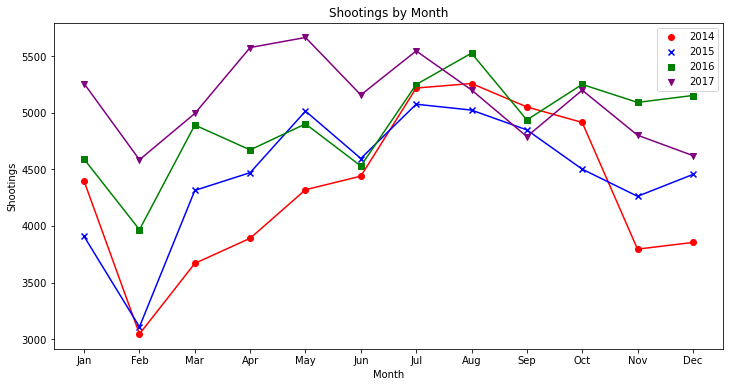

In [12]:
plt.figure(figsize=(12, 6))

plt.scatter(monthsStr, shootings14, c="Red", label="2014")
plt.plot(monthsStr, shootings14, c="Red")
plt.scatter(monthsStr, shootings15, c="Blue", label="2015", marker="x")
plt.plot(monthsStr, shootings15, c="Blue")
plt.scatter(monthsStr, shootings16, c="Green", label="2016", marker="s")
plt.plot(monthsStr, shootings16, c="Green")
plt.scatter(monthsStr, shootings17, c="Purple", label="2017", marker="v")
plt.plot(monthsStr, shootings17, c="Purple")
plt.legend()
plt.title("Shootings by Month")
plt.xlabel("Month")
plt.ylabel("Shootings")
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

## *Incidents Over Time (Line Graph)* ##

In [13]:
gunvDF["M/Y"] = gunvDF["year"] + "-" + gunvDF["month"]

In [14]:
shootingsMonthDF = gunvDF.groupby(by=["M/Y"]).count().reset_index()
shootingsMonthDF.drop(shootingsMonthDF.columns[2:], axis=1, inplace=True)

In [15]:
xMonth = shootingsMonthDF["M/Y"].to_list()
yCount = shootingsMonthDF["incident_id"].to_list()
nums = np.arange(0, 48)
np.polyfit(nums, yCount, 1)
p = np.poly1d(np.polyfit(nums, yCount, 1))

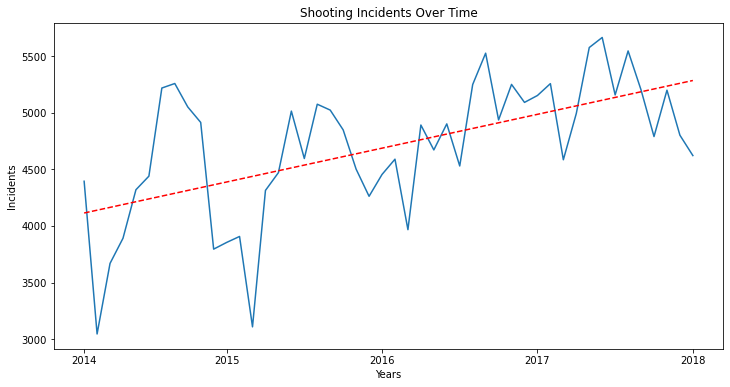

In [16]:
plt.figure(figsize=(12,6))
plt.plot(xMonth, yCount)
plt.plot(nums, p(nums), "r--")
plt.xticks([0,11,23,35,47], ["2014", "2015", "2016", "2017", "2018"])
plt.title("Shooting Incidents Over Time")
plt.xlabel("Years")
plt.ylabel("Incidents")
plt.show()

# 3: VIOLENCE AND CENSUS DATA #

In [17]:
vioCensus = pd.read_csv("violence_census_MASTER.csv")

## *Incidents Per Capita (100k Citizens of Voting Age)* ##

In [18]:
vioCensus["capita"] = vioCensus["count_of_inc"] / (vioCensus["pop_votingage_est"] / 100000)

In [19]:
vioCensus.race_white_perc.replace(to_replace="N", inplace=True)
vioCensus.race_black_perc.replace(to_replace="N", inplace=True)
vioCensus.race_asian_perc.replace(to_replace="N", value=np.nan, inplace=True)
vioCensus.race_native_perc.replace(to_replace="N", value=np.nan, inplace=True)
vioCensus.race_pacisland_perc.replace(to_replace="N", value=np.nan, inplace=True)
vioCensus.race_otherrace_perc.replace(to_replace="N", value=np.nan, inplace=True)
vioCensus.race_mixedrace_perc.replace(to_replace="N", value=np.nan, inplace=True)
vioCensus.race_hispanic_perc.replace(to_replace="N", value=np.nan, inplace=True)
vioCensus.race_wtnonhispanic_perc.replace(to_replace="N", value=np.nan, inplace=True)

In [20]:
vioCensusNA = vioCensus[vioCensus["capita"].notna()]    

In [21]:
vioCensusNA["capitaSTD"] = (vioCensusNA["capita"] - vioCensusNA["capita"].mean()) / vioCensusNA["capita"].std()

# REMOVE OUTLIERS > 2 STANDARD DEVIATION
vioCensusNA.drop(vioCensusNA[vioCensusNA["capitaSTD"] > 2].index, inplace=True)

In [22]:
capita = vioCensusNA.capita.to_numpy()
edlt9 = vioCensusNA.edu_ltgrade9_perc.to_numpy()
ed912 = vioCensusNA.edu_9to12_perc.to_numpy()
edhs = vioCensusNA.edu_hs_perc.to_numpy()
edsc = vioCensusNA.edu_somecollege_perc.to_numpy()
edbach = vioCensusNA.edu_bachelor_perc.to_numpy()
edgrad = vioCensusNA.edu_graduate_perc.to_numpy()
edbachplus = vioCensusNA.edu_bachormore_perc.to_numpy()
edhsplus = vioCensusNA.edu_hsormore_perc.to_numpy()
ag1829 = vioCensusNA.age_18to29_perc.to_numpy()
ag3044 = vioCensusNA.age_30to44_perc.to_numpy()
ag4564 = vioCensusNA.age_45to64_perc.to_numpy()
ag65plus = vioCensusNA.age_65plus_perc.to_numpy()
racewhite = vioCensusNA.race_white_perc.to_numpy()
raceblack = vioCensusNA.race_black_perc.to_numpy().astype(float)
raceasian = vioCensusNA.race_asian_perc.to_numpy().astype(float)
racenative = vioCensusNA.race_native_perc.to_numpy().astype(float)
racepacis = vioCensusNA.race_pacisland_perc.to_numpy().astype(float)
raceother = vioCensusNA.race_otherrace_perc.to_numpy().astype(float)
racemixed = vioCensusNA.race_mixedrace_perc.to_numpy().astype(float)
racehisp = vioCensusNA.race_hispanic_perc.to_numpy().astype(float)
racewtnonhisp = vioCensusNA.race_wtnonhispanic_perc.to_numpy().astype(float)
male = vioCensusNA.male_perc.to_numpy()
female = vioCensusNA.female_perc.to_numpy()
pov = vioCensusNA.poverty_perc.to_numpy()
votingrate = vioCensusNA.pop_votingrate_perc.to_numpy()

## *Incidents Per Capita (RACE)* ##

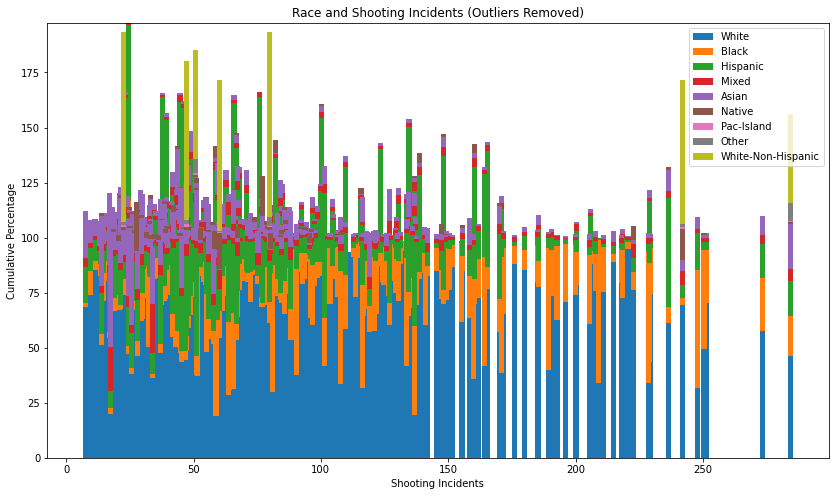

In [23]:
plt.figure(figsize=(14,8))
plt.bar(capita, racewhite, label="White", width=2)
plt.bar(capita, raceblack, label="Black", bottom=racewhite, width=2)
plt.bar(capita, racehisp, label="Hispanic", bottom=racewhite+raceblack, width=2)
plt.bar(capita, racemixed, label="Mixed", bottom=racewhite+raceblack+racehisp, width=2)
plt.bar(capita, raceasian, label="Asian", bottom=racewhite+raceblack+racehisp+racemixed, width=2)
plt.bar(capita, racenative, label="Native", bottom=racewhite+raceblack+racehisp+racemixed+raceasian, width=2)
plt.bar(capita, racepacis, label="Pac-Island", bottom=racewhite+raceblack+racehisp+racemixed+raceasian+racenative, width=2)
plt.bar(capita, raceother, label="Other", bottom=racewhite+raceblack+racehisp+racemixed+raceasian+racenative+racepacis, width=2)
plt.bar(capita, racewtnonhisp, label="White-Non-Hispanic", bottom=racewhite+raceblack+racehisp+racemixed+raceasian+racenative+racepacis+raceother, width=2)
plt.legend()
plt.title("Race and Shooting Incidents (Outliers Removed)")
plt.ylabel("Cumulative Percentage")
plt.xlabel("Shooting Incidents")
plt.show()

## *Incidents Per Capita (EDUCATION)* ##

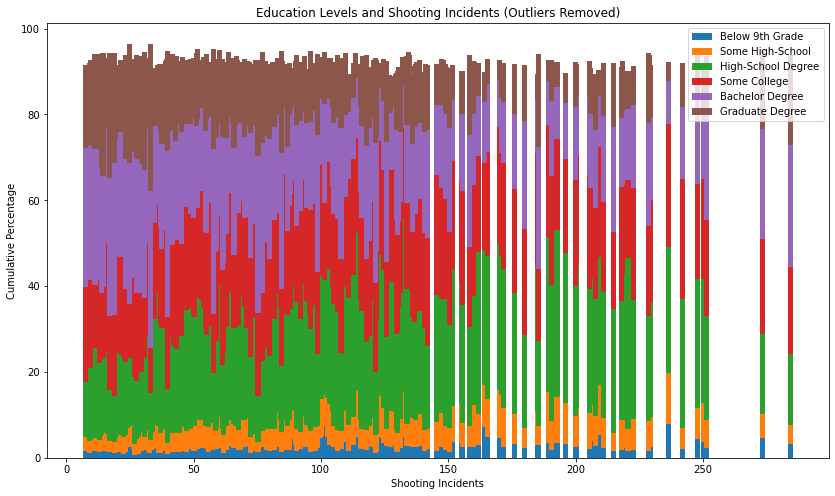

In [24]:
plt.figure(figsize=(14,8))
plt.bar(capita, edlt9, label="Below 9th Grade", width=2)
plt.bar(capita, ed912, label="Some High-School", bottom=edlt9, width=2)
plt.bar(capita, edhs, label="High-School Degree", bottom=edlt9+ed912, width=2)
plt.bar(capita, edsc, label="Some College", bottom=edlt9+ed912+edhs, width=2)
plt.bar(capita, edbach, label="Bachelor Degree", bottom=edlt9+ed912+edhs+edsc, width=2)
plt.bar(capita, edgrad, label="Graduate Degree", bottom=edlt9+ed912+edhs+edsc+edbach, width=2)
plt.legend()
plt.title("Education Levels and Shooting Incidents (Outliers Removed)")
plt.ylabel("Cumulative Percentage")
plt.xlabel("Shooting Incidents")
plt.show()

## *Incidents Per Capita (AGE)* ##

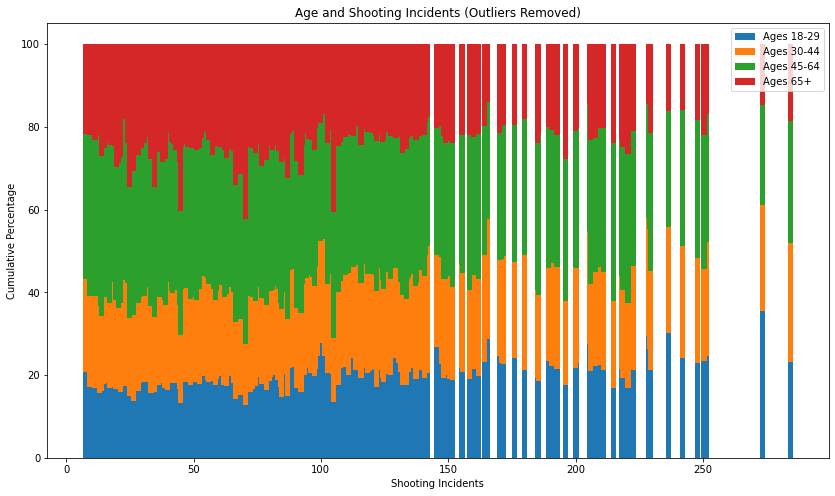

In [25]:
plt.figure(figsize=(14,8))
plt.bar(capita, ag1829, label="Ages 18-29", width=2)
plt.bar(capita, ag3044, label="Ages 30-44", bottom=ag1829, width=2)
plt.bar(capita, ag4564, label="Ages 45-64", bottom=ag1829+ag3044, width=2)
plt.bar(capita, ag65plus, label="Ages 65+", bottom=ag1829+ag3044+ag4564, width=2)
plt.legend()
plt.title("Age and Shooting Incidents (Outliers Removed)")
plt.ylabel("Cumulative Percentage")
plt.xlabel("Shooting Incidents")
plt.show()

## *Incidents Per Capita (GENDER)* ##

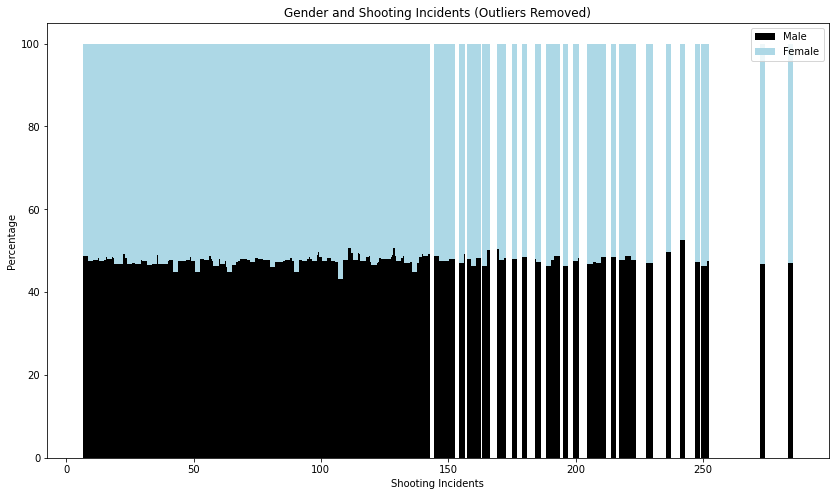

In [26]:
plt.figure(figsize=(14,8))
plt.bar(capita, male, label="Male", width=2, color="black")
plt.bar(capita, female, label="Female", bottom=male, width=2, color='lightblue')
plt.legend()
plt.title("Gender and Shooting Incidents (Outliers Removed)")
plt.ylabel("Percentage")
plt.xlabel("Shooting Incidents")
plt.show()

## *Incidents Per Capita (POVERTY)* ##

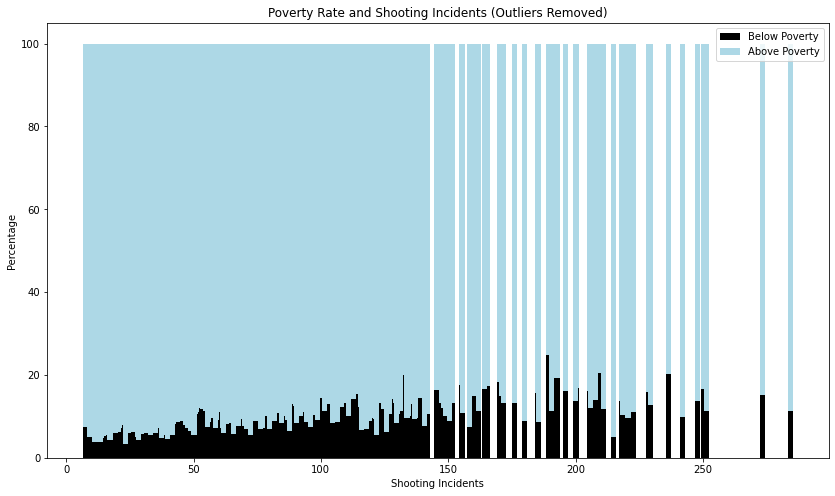

In [27]:
povi = []
for item in pov:
    inverse = 100-item
    povi.append(inverse)

plt.figure(figsize=(14,8))
plt.bar(capita, pov, label="Below Poverty", width=2, color="black")
plt.bar(capita, povi, label="Above Poverty", bottom=pov, width=2, color="lightblue")
plt.legend()
plt.title("Poverty Rate and Shooting Incidents (Outliers Removed)")
plt.ylabel("Percentage")
plt.xlabel("Shooting Incidents")
plt.show()

## *Incidents Per Capita (VOTING RATE)* ##

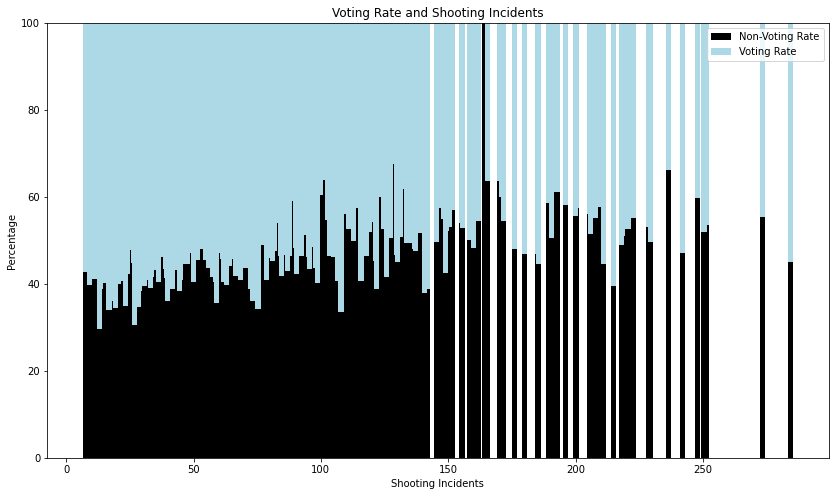

In [28]:
votingi = []
for item in votingrate:
    inverse = 100-item
    votingi.append(inverse)

plt.figure(figsize=(14,8))
plt.bar(capita, votingi, label="Non-Voting Rate", width=2, color="black")
plt.bar(capita, votingrate, label="Voting Rate", bottom=votingi, width=2, color='lightblue')
plt.legend()
plt.title("Voting Rate and Shooting Incidents")
plt.ylabel("Percentage")
plt.xlabel("Shooting Incidents")
plt.show()

# 4: SHOOTING INCIDENTS AND PARTY REPRESENTATION #

In [29]:
reps = pd.read_csv("representatives_MASTER.csv")
vio = pd.read_csv("violence_census_MASTER.csv")

In [30]:
vio["capita"] = vio["count_of_inc"] / (vio["pop_votingage_est"] / 100000)
vio["capitaSTD"] = (vio["capita"] - vio["capita"].mean()) / vio["capita"].std()

In [31]:
vio.drop(vio.columns[2:-2], axis=1, inplace=True)

# REMOVE ALL ENTRIES FOR TERMS OTHER THAN 114 (2015-2017)
reps.drop(reps[reps["term"] != 114].index, inplace=True)

In [32]:
combo = reps.merge(vio, on="area_id")

# REMOVE OUTLIERS > 2 STANDARD DEVIATION
comboNO = combo.drop(combo[combo["capitaSTD"] > 2].index)

In [33]:
dems = combo.drop(combo[combo["group"] != "Democrat"].index)
repubs = combo.drop(combo[combo["group"] != "Republican"].index)
demsNO = comboNO.drop(comboNO[comboNO["group"] != "Democrat"].index)
repubsNO = comboNO.drop(comboNO[comboNO["group"] != "Republican"].index)

In [34]:
seats = np.arange(250)
demVio = dems.capitaSTD.sort_values().to_list()
repubVio = repubs.capitaSTD.sort_values().to_list()
demVioNO = demsNO.capitaSTD.sort_values().to_list()
repubVioNO = repubsNO.capitaSTD.sort_values().to_list()

In [35]:
ddif = 250-len(demVio)
a = 0
while a < ddif:
    demVio.insert(0, 0)
    a = a + 1
    
rdif = 250-len(repubVio)
b = 0 
while b < rdif:
    repubVio.insert(0, 0)
    b = b + 1

In [36]:
ddif2 = 250-len(demVioNO)
a2 = 0
while a2 < ddif2:
    demVioNO.insert(0, 0)
    a2 = a2 + 1
    
rdif2 = 250-len(repubVioNO)
b2 = 0 
while b2 < rdif2:
    repubVioNO.insert(0, 0)
    b2 = b2 + 1

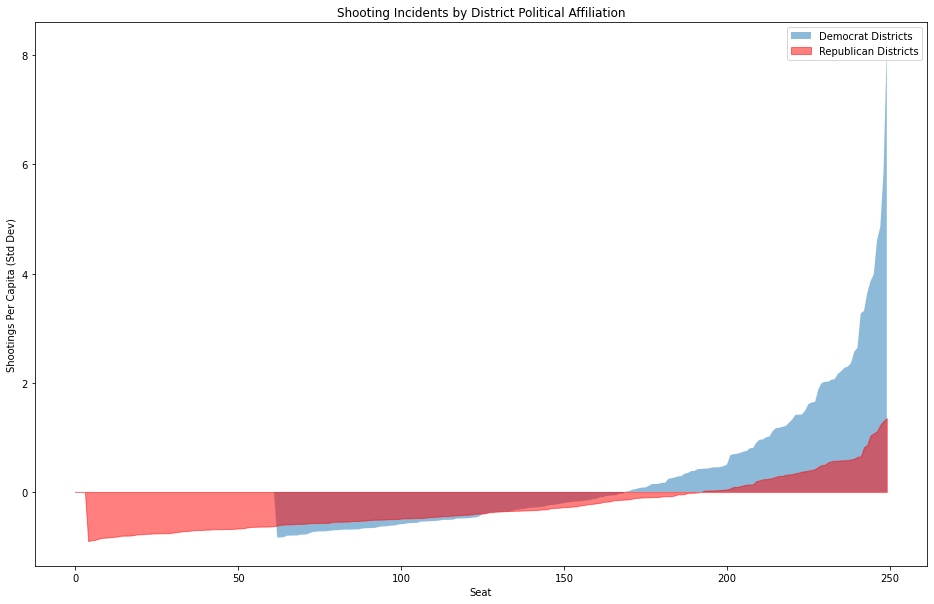

In [37]:
plt.figure(figsize=(16,10))
plt.fill_between(seats, demVio, alpha=0.5, label="Democrat Districts")
plt.fill_between(seats, repubVio, alpha=0.5, color="red", label="Republican Districts")
plt.legend()
plt.xlabel("Seat")
plt.ylabel("Shootings Per Capita (Std Dev)")
plt.title("Shooting Incidents by District Political Affiliation")
plt.show()

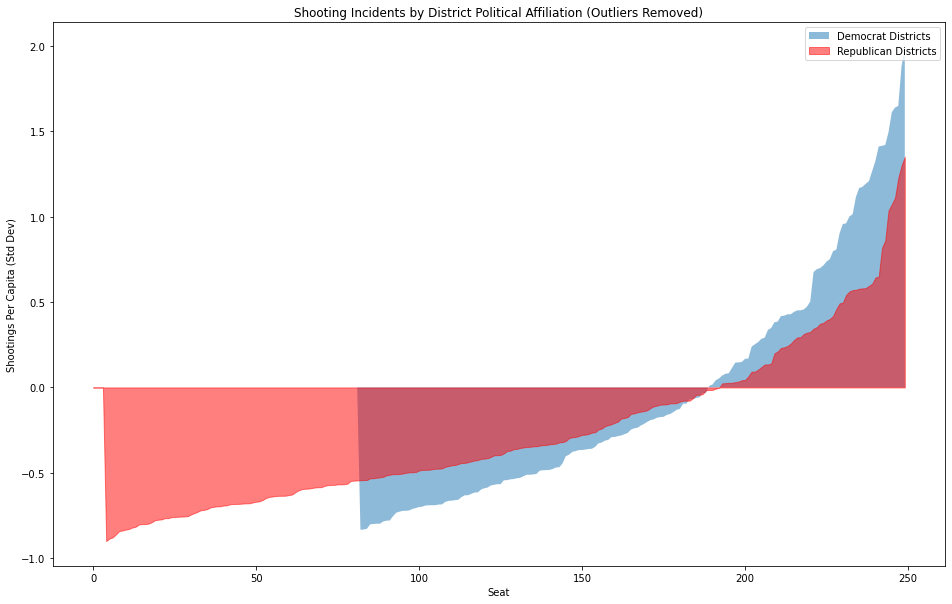

In [38]:
plt.figure(figsize=(16,10))
plt.fill_between(seats, demVioNO, alpha=0.5, label="Democrat Districts")
plt.fill_between(seats, repubVioNO, alpha=0.5, color="red", label="Republican Districts")
plt.legend()
plt.xlabel("Seat")
plt.ylabel("Shootings Per Capita (Std Dev)")
plt.title("Shooting Incidents by District Political Affiliation (Outliers Removed)")
plt.show()